In [1]:
# NEW new normalizations
# NOT normalizing the inputs
# tanh activation
# sigmoid for gam0

# Imports

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import lalsimulation as lal
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
import keras
import keras_metrics as km
import keras
import keras_metrics as km
from keras import metrics

# Functions

In [38]:
#return gammas back to original values in order to plot EOS

#γ0 ∈ [0.2, 2.0]
#γ1 ∈ [−1.6, 1.7]
#γ2 ∈ [−0.6, 0.6]
#γ3 ∈ [−0.02, 0.02]

def unnorm(gammaarray):
    
    for i in range (len(gammaarray)):
        new_gamma0_array = gammaarray[0]  * ( 2.0 - 0.2 ) + 0.2
        new_gamma1_array = gammaarray[1] * 1.7
        new_gamma2_array = gammaarray[2] * 0.6
        new_gamma3_array = gammaarray[3] * 0.02

    new_gamma_array = np.concatenate((new_gamma0_array, new_gamma1_array, new_gamma2_array, new_gamma3_array), axis=1)

    return new_gamma_array
    

In [39]:
#formatting array & processing outputs

def format_output(data):
    gamma0 = data.pop('gamma0')
    gamma0 = np.array(gamma0)
    gamma1 = data.pop('gamma1')
    gamma1 = np.array(gamma1)
    gamma2 = data.pop('gamma2')
    gamma2 = np.array(gamma2)
    gamma3 = data.pop('gamma3')
    gamma3 = np.array(gamma3)
    return gamma0, gamma1, gamma2, gamma3


In [40]:
def whiten(df):
    
    df_new = pd.DataFrame()
    for k in df.keys():
        df_new[k] = (df[k]-np.mean(df[k])) / np.std(df[k])
    return df_new

    #return (x - train_stats['mean']) / train_stats['std']

#  MLA

In [41]:
#inputs

m1_dat = np.loadtxt("m1.dat.txt", dtype=float)
m2_dat = np.loadtxt("m2.dat.txt", dtype=float)
l1_dat = np.loadtxt("l1.dat.txt", dtype=float)
l2_dat = np.loadtxt("l2.dat.txt", dtype=float)

#outputs

sd_gamma0_real = np.loadtxt("sd_gamma0.dat.txt", dtype=float)
sd_gamma1_real = np.loadtxt("sd_gamma1.dat.txt", dtype=float)
sd_gamma2_real = np.loadtxt("sd_gamma2.dat.txt", dtype=float)
sd_gamma3_real = np.loadtxt("sd_gamma3.dat.txt", dtype=float)


In [46]:

#normalize outputs

#γ0 ∈ [0.2, 2.0]
#γ1 ∈ [−1.6, 1.7]
#γ2 ∈ [−0.6, 0.6]
#γ3 ∈ [−0.02, 0.02]

sd_gamma0 = ( sd_gamma0_real - 0.2 ) / ( 2.0 - 0.2 )
sd_gamma1 = sd_gamma1_real/1.7
sd_gamma2 = sd_gamma2_real/0.6
sd_gamma3 = sd_gamma3_real/0.02


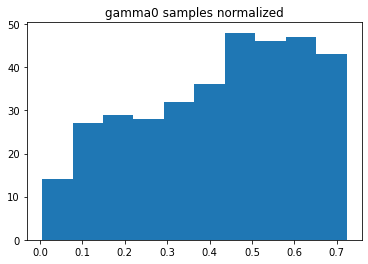

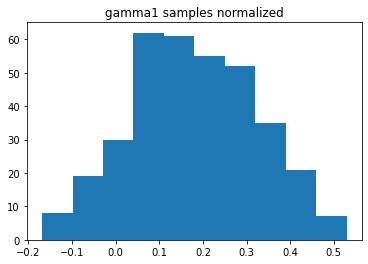

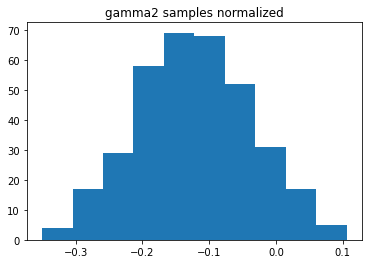

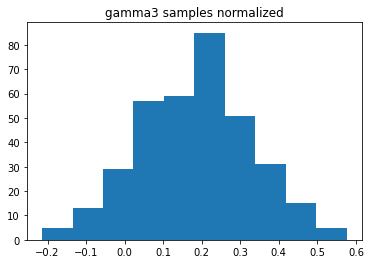

In [48]:
plt.hist(sd_gamma0)
plt.title("gamma0 samples normalized")
#print(np.min(sd_gamma0))
#print(np.max(sd_gamma0))
plt.show()

plt.hist(sd_gamma1)
plt.title("gamma1 samples normalized")
#print(np.min(sd_gamma1))
#print(np.max(sd_gamma1))
plt.show()

plt.hist(sd_gamma2)
plt.title("gamma2 samples normalized")
#print(np.min(sd_gamma2))
#print(np.max(sd_gamma2))
plt.show()

plt.hist(sd_gamma3)
plt.title("gamma3 samples normalized")
#print(np.min(sd_gamma3))
#print(np.max(sd_gamma3))
plt.show()

In [8]:
#create an empty array 8 x length(m1_dat]) for vals
array_size =  np.array([[0] * 8 ] * 350)
array_size = array_size.astype('float64')
combined_array = np.zeros_like(array_size)
print(combined_array.dtype)
print(combined_array.shape)

float64
(350, 8)


In [9]:
#reformat data files into this new array
for i in range(0,len(m1_dat)-1):
    combined_array[i][0] = m1_dat[i]
    combined_array[i][1] = m2_dat[i]
    combined_array[i][2] = l1_dat[i]
    combined_array[i][3] = l2_dat[i]
    combined_array[i][4] = sd_gamma0[i]
    combined_array[i][5] = sd_gamma1[i]
    combined_array[i][6] = sd_gamma2[i]
    combined_array[i][7] = sd_gamma3[i]
    

In [10]:
data = pd.DataFrame(combined_array)
data.columns = ['m1','m2', 'l1', 'l2','gamma0', 'gamma1', 'gamma2', 'gamma3']
print(data)

           m1        m2          l1           l2    gamma0    gamma1  \
0    2.356079  1.050408   86.742387  7564.514274  0.573303  0.169377   
1    1.835028  1.645969  143.696599   304.007610  0.247882  0.363438   
2    1.560813  1.397909   53.916191   116.756380  0.026970  0.272407   
3    1.494956  1.323438  466.916534   934.746557  0.421740  0.079028   
4    1.526318  1.099764  288.106098  1692.777747  0.093814  0.381883   
..        ...       ...         ...          ...       ...       ...   
345  1.793659  1.324266  489.011516  2505.901820  0.580751  0.181717   
346  1.937342  1.670398   95.801566   306.240963  0.513729  0.105156   
347  2.039313  1.527568   44.843342   366.158904  0.490871  0.019230   
348  2.300180  2.271107   76.301166    85.538663  0.575036  0.165086   
349  0.000000  0.000000    0.000000     0.000000  0.000000  0.000000   

       gamma2    gamma3  
0   -0.154291  0.280229  
1   -0.255271  0.439465  
2   -0.092208  0.065249  
3   -0.021606 -0.030625  
4   -

In [11]:
#split data into train and test

data = data.sample(frac=1).reset_index(drop=True)

train, test = train_test_split(data, test_size=0.2)

print(train)

train_stats = train.describe()

#get gamma as the outputs and format them as np arrays.

train_stats.pop('gamma0')
train_stats.pop('gamma1')
train_stats.pop('gamma2')
train_stats.pop('gamma3')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

           m1        m2           l1           l2    gamma0    gamma1  \
317  2.310067  1.901795    98.184483   324.134360  0.460457  0.220610   
323  1.470212  1.437776   797.743852   908.860070  0.609035 -0.001184   
222  1.874290  1.482922   115.231858   625.135750  0.647450 -0.045762   
251  1.795850  1.684649   188.471334   294.898411  0.338004  0.290354   
294  1.035695  1.003696  2920.633253  3402.347959  0.187434  0.313033   
..        ...       ...          ...          ...       ...       ...   
88   2.103045  1.369909    35.711398  1000.973291  0.361550  0.260355   
344  2.507833  1.771709    39.499714   491.982598  0.661707  0.052225   
17   2.377307  2.039687    17.331355    75.773890  0.405943  0.163683   
297  3.218281  2.870570     5.442906    24.482279  0.658769  0.070922   
276  2.214331  1.290430    32.351953  1584.002679  0.488909  0.133138   

       gamma2    gamma3  
317 -0.144010  0.206123  
323 -0.020520  0.024030  
222 -0.007568  0.045900  
251 -0.214433  0.34

In [13]:
#whitening
#norm_train_X = whiten(train)
#norm_test_X = whiten(test)

norm_train_X = train
norm_test_X = test

In [14]:
# build the model using the functional syntax

# output will be fed directly from the previous dense layer

act = 'tanh'

input_layer = Input(shape=(len(train .columns),))

#norm = normalizer(input_layer)

first_dense = Dense(units='128', activation=act)(input_layer)
second_dense = Dense(units='128', activation=act)(first_dense)
third_dense = Dense(units='128', activation=act)(second_dense)
fourth_dense = Dense(units='128', activation=act)(third_dense)
fifth_dense = Dense(units='128', activation=act)(fourth_dense)
sixth_dense = Dense(units='128', activation=act)(fifth_dense)
seventh_dense = Dense(units='128', activation=act)(sixth_dense)
eight_dense = Dense(units='128', activation=act)(seventh_dense)
ninth_dense = Dense(units='128', activation=act)(eight_dense)
    
tenth_dense = Dense(units='128', activation=act)(ninth_dense)
eleventh_dense = Dense(units='128', activation=act)(tenth_dense)
twelth_dense = Dense(units='128', activation=act)(eleventh_dense)
thirteenth_dense = Dense(units='128', activation=act)(twelth_dense)
fourteenth_dense = Dense(units='128', activation=act)(thirteenth_dense)
fifteenth_dense = Dense(units='128', activation=act)(fourteenth_dense)
sixteenth_dense = Dense(units='128', activation=act)(fifteenth_dense)
seventeenth_dense = Dense(units='128', activation=act)(sixteenth_dense)
eighteenth_dense = Dense(units='128', activation=act)(seventeenth_dense)
nineteenth_dense = Dense(units='128', activation=act)(eighteenth_dense)
    
twentieth_dense = Dense(units='128', activation=act)(nineteenth_dense)
tf_dense = Dense(units='128', activation=act)(twentieth_dense)
ts_dense = Dense(units='128', activation=act)(tf_dense)
tt_dense = Dense(units='128', activation=act)(ts_dense)
tfo_dense = Dense(units='128', activation=act)(tt_dense)
tfi_dense = Dense(units='128', activation=act)(tfo_dense)
ts_dense = Dense(units='128', activation=act)(tfi_dense)
tse_dense = Dense(units='128', activation=act)(ts_dense)
te_dense = Dense(units='128', activation=act)(tse_dense)
tn_dense = Dense(units='128', activation=act)(te_dense)


gamma0_output = Dense(units='1', activation='sigmoid', name='gamma0_output')(tn_dense)
thf_dense = Dense(units='64', activation=act)(tn_dense)

ths_dense = Dense(units='128', activation=act)(thf_dense)
tht_dense = Dense(units='128', activation=act)(ths_dense)
thfo_dense = Dense(units='128', activation=act)(tht_dense)
thfi_dense = Dense(units='128', activation=act)(thfo_dense)
ths_dense = Dense(units='128', activation=act)(thfi_dense)
thse_dense = Dense(units='128', activation=act)(ths_dense)
the_dense = Dense(units='128', activation=act)(thse_dense)
thn_dense = Dense(units='128', activation=act)(the_dense)

gamma1_output = Dense(units='1', activation=act, name='gamma1_output')(thn_dense)
fo_dense = Dense(units='32',activation=act)(thn_dense)

fof_dense = Dense(units='128', activation=act)(fo_dense)
fos_dense = Dense(units='128', activation=act)(fof_dense)
fot_dense = Dense(units='128', activation=act)(fos_dense)
fofo_dense = Dense(units='128', activation=act)(fot_dense)
fofi_dense = Dense(units='128', activation=act)(fofo_dense)

gamma2_output = Dense(units='1', activation=act, name='gamma2_output')(fofi_dense)
fos_dense = Dense(units='16',activation=act)(fofi_dense)

fose_dense = Dense(units='128', activation=act)(fos_dense)
foe_dense = Dense(units='128', activation=act)(fose_dense)
fon_dense = Dense(units='128', activation=act)(foe_dense)
fif_dense = Dense(units='128', activation=act)(fon_dense)

gamma3_output = Dense(units='1', activation=act, name='gamma3_output')(fon_dense)

model = Model(inputs=input_layer, outputs=[gamma0_output, gamma1_output, gamma2_output, gamma3_output])

print(model.summary())


2023-07-28 12:41:49.023810: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          640         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 128)          16512       ['dense_1[0][0]']                
                                                                                              

 dense_39 (Dense)               (None, 128)          4224        ['dense_38[0][0]']               
                                                                                                  
 dense_40 (Dense)               (None, 128)          16512       ['dense_39[0][0]']               
                                                                                                  
 dense_41 (Dense)               (None, 128)          16512       ['dense_40[0][0]']               
                                                                                                  
 dense_42 (Dense)               (None, 128)          16512       ['dense_41[0][0]']               
                                                                                                  
 dense_43 (Dense)               (None, 128)          16512       ['dense_42[0][0]']               
                                                                                                  
 dense_44 

In [15]:
#plot_model(model, to_file='V5_combinedmll.png', show_shapes=True, show_layer_names=True)

In [16]:
#specify the optimizer as stochastic gradient descent and will mention the learning rate as 0.001
#compile the model with loss functions for both outputs
from keras import metrics

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss={'gamma0_output': 'mse', 'gamma1_output': 'mse', 'gamma2_output': 'mse', 'gamma3_output': 'mse'},
              metrics={
                       'gamma0_output': tf.keras.metrics.MeanSquaredError() ,
                       'gamma1_output': tf.keras.metrics.MeanSquaredError(),
                       'gamma2_output': tf.keras.metrics.MeanSquaredError() ,
                       'gamma3_output': tf.keras.metrics.MeanSquaredError()
                      })


endmetric = "mean_squared_error"


In [17]:
#train the model for a number of epochs

numepochs = 200
    
history = model.fit(norm_train_X.to_numpy(), train_Y,
                    epochs=numepochs, batch_size=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=50,mode='auto')])

Epoch 1/200
23/23 [==============================] - 5s 52ms/step - loss: 0.1348 - gamma0_output_loss: 0.0386 - gamma1_output_loss: 0.0532 - gamma2_output_loss: 0.0171 - gamma3_output_loss: 0.0259 - gamma0_output_mean_squared_error: 0.0386 - gamma1_output_mean_squared_error: 0.0532 - gamma2_output_mean_squared_error: 0.0171 - gamma3_output_mean_squared_error: 0.0259 - val_loss: 0.2232 - val_gamma0_output_loss: 0.0411 - val_gamma1_output_loss: 0.0820 - val_gamma2_output_loss: 0.0380 - val_gamma3_output_loss: 0.0621 - val_gamma0_output_mean_squared_error: 0.0411 - val_gamma1_output_mean_squared_error: 0.0820 - val_gamma2_output_mean_squared_error: 0.0380 - val_gamma3_output_mean_squared_error: 0.0621
Epoch 2/200
23/23 [==============================] - 0s 19ms/step - loss: 0.0967 - gamma0_output_loss: 0.0379 - gamma1_output_loss: 0.0252 - gamma2_output_loss: 0.0106 - gamma3_output_loss: 0.0230 - gamma0_output_mean_squared_error: 0.0379 - gamma1_output_mean_squared_error: 0.0252 - gamma2_

Epoch 13/200
23/23 [==============================] - 0s 15ms/step - loss: 0.0833 - gamma0_output_loss: 0.0371 - gamma1_output_loss: 0.0198 - gamma2_output_loss: 0.0067 - gamma3_output_loss: 0.0197 - gamma0_output_mean_squared_error: 0.0371 - gamma1_output_mean_squared_error: 0.0198 - gamma2_output_mean_squared_error: 0.0067 - gamma3_output_mean_squared_error: 0.0197 - val_loss: 0.1545 - val_gamma0_output_loss: 0.0487 - val_gamma1_output_loss: 0.0588 - val_gamma2_output_loss: 0.0138 - val_gamma3_output_loss: 0.0331 - val_gamma0_output_mean_squared_error: 0.0487 - val_gamma1_output_mean_squared_error: 0.0588 - val_gamma2_output_mean_squared_error: 0.0138 - val_gamma3_output_mean_squared_error: 0.0331
Epoch 14/200
23/23 [==============================] - 0s 14ms/step - loss: 0.0894 - gamma0_output_loss: 0.0389 - gamma1_output_loss: 0.0222 - gamma2_output_loss: 0.0074 - gamma3_output_loss: 0.0209 - gamma0_output_mean_squared_error: 0.0389 - gamma1_output_mean_squared_error: 0.0222 - gamma

Epoch 25/200
23/23 [==============================] - 0s 14ms/step - loss: 0.0819 - gamma0_output_loss: 0.0358 - gamma1_output_loss: 0.0196 - gamma2_output_loss: 0.0067 - gamma3_output_loss: 0.0198 - gamma0_output_mean_squared_error: 0.0358 - gamma1_output_mean_squared_error: 0.0196 - gamma2_output_mean_squared_error: 0.0067 - gamma3_output_mean_squared_error: 0.0198 - val_loss: 0.0871 - val_gamma0_output_loss: 0.0369 - val_gamma1_output_loss: 0.0209 - val_gamma2_output_loss: 0.0073 - val_gamma3_output_loss: 0.0219 - val_gamma0_output_mean_squared_error: 0.0369 - val_gamma1_output_mean_squared_error: 0.0209 - val_gamma2_output_mean_squared_error: 0.0073 - val_gamma3_output_mean_squared_error: 0.0219
Epoch 26/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0821 - gamma0_output_loss: 0.0359 - gamma1_output_loss: 0.0196 - gamma2_output_loss: 0.0068 - gamma3_output_loss: 0.0199 - gamma0_output_mean_squared_error: 0.0359 - gamma1_output_mean_squared_error: 0.0196 - gamma

Epoch 37/200
23/23 [==============================] - 0s 16ms/step - loss: 0.0797 - gamma0_output_loss: 0.0348 - gamma1_output_loss: 0.0188 - gamma2_output_loss: 0.0066 - gamma3_output_loss: 0.0195 - gamma0_output_mean_squared_error: 0.0348 - gamma1_output_mean_squared_error: 0.0188 - gamma2_output_mean_squared_error: 0.0066 - gamma3_output_mean_squared_error: 0.0195 - val_loss: 0.0874 - val_gamma0_output_loss: 0.0365 - val_gamma1_output_loss: 0.0203 - val_gamma2_output_loss: 0.0077 - val_gamma3_output_loss: 0.0229 - val_gamma0_output_mean_squared_error: 0.0365 - val_gamma1_output_mean_squared_error: 0.0203 - val_gamma2_output_mean_squared_error: 0.0077 - val_gamma3_output_mean_squared_error: 0.0229
Epoch 38/200
23/23 [==============================] - 0s 18ms/step - loss: 0.0796 - gamma0_output_loss: 0.0350 - gamma1_output_loss: 0.0190 - gamma2_output_loss: 0.0065 - gamma3_output_loss: 0.0190 - gamma0_output_mean_squared_error: 0.0350 - gamma1_output_mean_squared_error: 0.0190 - gamma

Epoch 49/200
23/23 [==============================] - 0s 14ms/step - loss: 0.0787 - gamma0_output_loss: 0.0345 - gamma1_output_loss: 0.0186 - gamma2_output_loss: 0.0065 - gamma3_output_loss: 0.0191 - gamma0_output_mean_squared_error: 0.0345 - gamma1_output_mean_squared_error: 0.0186 - gamma2_output_mean_squared_error: 0.0065 - gamma3_output_mean_squared_error: 0.0191 - val_loss: 0.0907 - val_gamma0_output_loss: 0.0356 - val_gamma1_output_loss: 0.0247 - val_gamma2_output_loss: 0.0078 - val_gamma3_output_loss: 0.0226 - val_gamma0_output_mean_squared_error: 0.0356 - val_gamma1_output_mean_squared_error: 0.0247 - val_gamma2_output_mean_squared_error: 0.0078 - val_gamma3_output_mean_squared_error: 0.0226
Epoch 50/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0814 - gamma0_output_loss: 0.0358 - gamma1_output_loss: 0.0195 - gamma2_output_loss: 0.0066 - gamma3_output_loss: 0.0194 - gamma0_output_mean_squared_error: 0.0358 - gamma1_output_mean_squared_error: 0.0195 - gamma

In [18]:
loss, gamma0_loss, gamma0_accuracy, gamma1_loss, gamma1_accuracy, gamma2_loss, gamma2_accuracy, gamma3_loss, gamma3_accuracy = model.evaluate(x=norm_test_X.to_numpy(), y=test_Y)

3/3 [==============================] - 0s 6ms/step - loss: 0.1055 - gamma0_output_loss: 0.0393 - gamma1_output_loss: 0.0266 - gamma2_output_loss: 0.0105 - gamma3_output_loss: 0.0292 - gamma0_output_mean_squared_error: 0.0393 - gamma1_output_mean_squared_error: 0.0266 - gamma2_output_mean_squared_error: 0.0105 - gamma3_output_mean_squared_error: 0.0292


In [19]:
#predictions = model.predict(norm_test_X.to_numpy())

new_predictions = model.predict(norm_train_X.to_numpy())
predictions = unnorm(new_predictions)


9/9 [==============================] - 0s 11ms/step


0.37082285
0.49628532


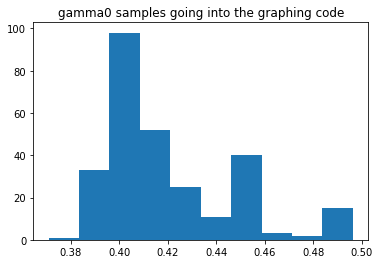

0.10510718
0.20186992


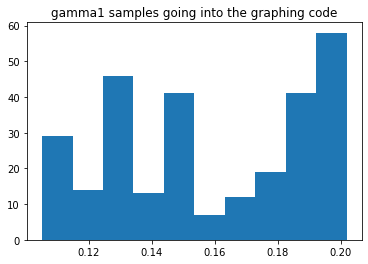

-0.12999932
-0.07318617


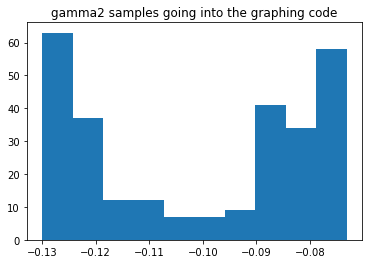

0.10897927
0.20230085


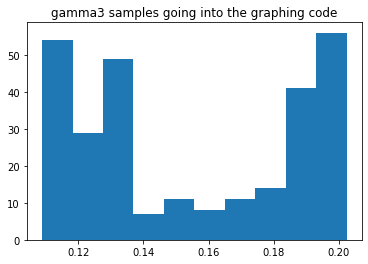

In [44]:
plt.hist(new_predictions[0])
plt.title("gamma0 samples going into the graphing code")
print(np.min(new_predictions[0]))
print(np.max(new_predictions[0]))
plt.show()

plt.hist(new_predictions[1])
print(np.min(new_predictions[1]))
print(np.max(new_predictions[1]))
plt.title("gamma1 samples going into the graphing code")
plt.show()

plt.hist(new_predictions[2])
print(np.min(new_predictions[2]))
print(np.max(new_predictions[2]))
plt.title("gamma2 samples going into the graphing code")
plt.show()

plt.hist(new_predictions[3])
print(np.min(new_predictions[3]))
print(np.max(new_predictions[3]))
plt.title("gamma3 samples going into the graphing code")
plt.show()

In [20]:
len(predictions)

280

# EOS

In [21]:
length = len(predictions)

Progress : 0 / 280, 0.00%
Progress : 35 / 280, 12.50%
Progress : 70 / 280, 25.00%
Progress : 105 / 280, 37.50%
Progress : 140 / 280, 50.00%
Progress : 175 / 280, 62.50%
Progress : 210 / 280, 75.00%
Progress : 245 / 280, 87.50%


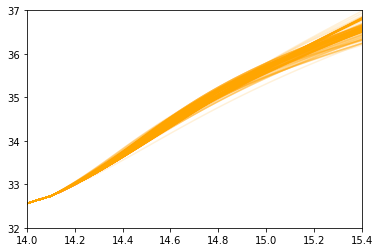

In [22]:
hlow_0 = 0.022460530117115313
hlow_1 = 0.024210313916473953
hlow = np.linspace(hlow_0,hlow_1,10,endpoint=False)
for i in range(length):
    
    gam0 = float(predictions[i][0])
    gam1 = float(predictions[i][1])
    gam2 = float(predictions[i][2])
    gam3 = float(predictions[i][3])
    
    if i%35==0:
        print('Progress : %d / %d, %0.2f%%'%(i,length,float(i/length*100)))
    pdat = []
    rdat = []
    eos = lal.SimNeutronStarEOS4ParameterSpectralDecomposition(gam0,gam1,gam2,gam3)
    hmax = lal.SimNeutronStarEOSMaxPseudoEnthalpy(eos)
    hhigh = 10**np.linspace(np.log10(hlow_1),np.log10(hmax-.0001),100)
    hdat = np.concatenate([hlow,hhigh])
    for h in hdat:
        pdat.append(lal.SimNeutronStarEOSPressureOfPseudoEnthalpy(h,eos)*10)
        rdat.append(lal.SimNeutronStarEOSRestMassDensityOfPseudoEnthalpy(h,eos)*.001)
    #plt.plot(np.log10(rdat),np.log10(pdat),'o',alpha=0.15)
    plt.plot(np.log10(rdat),np.log10(pdat),color='orange',alpha=0.15)

plt.xlim([14,15.4])
plt.ylim([32,37])
plt.show()

# Actual EOS

In [25]:
length = len(sd_gamma0_real)

In [27]:
length

350

Progress : 0 / 350, 0.00%
Progress : 25 / 350, 7.14%
Progress : 50 / 350, 14.29%
Progress : 75 / 350, 21.43%
Progress : 100 / 350, 28.57%
Progress : 125 / 350, 35.71%
Progress : 150 / 350, 42.86%
Progress : 175 / 350, 50.00%
Progress : 200 / 350, 57.14%
Progress : 225 / 350, 64.29%
Progress : 250 / 350, 71.43%
Progress : 275 / 350, 78.57%
Progress : 300 / 350, 85.71%
Progress : 325 / 350, 92.86%


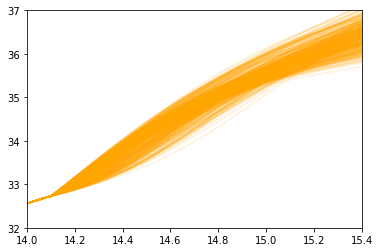

In [28]:
hlow_0 = 0.022460530117115313
hlow_1 = 0.024210313916473953
hlow = np.linspace(hlow_0,hlow_1,10,endpoint=False)
for i in range(length):
    
    gam0 = float(sd_gamma0_real[i])
    gam1 = float(sd_gamma1_real[i])
    gam2 = float(sd_gamma2_real[i])
    gam3 = float(sd_gamma3_real[i])
    
    if i%25==0:
        print('Progress : %d / %d, %0.2f%%'%(i,length,float(i/length*100)))
    pdat = []
    rdat = []
    eos = lal.SimNeutronStarEOS4ParameterSpectralDecomposition(gam0,gam1,gam2,gam3)
    hmax = lal.SimNeutronStarEOSMaxPseudoEnthalpy(eos)
    hhigh = 10**np.linspace(np.log10(hlow_1),np.log10(hmax-.0001),100)
    hdat = np.concatenate([hlow,hhigh])
    for h in hdat:
        pdat.append(lal.SimNeutronStarEOSPressureOfPseudoEnthalpy(h,eos)*10)
        rdat.append(lal.SimNeutronStarEOSRestMassDensityOfPseudoEnthalpy(h,eos)*.001)
    #plt.plot(np.log10(rdat),np.log10(pdat),'o',alpha=0.15)
    plt.plot(np.log10(rdat),np.log10(pdat),color='orange',alpha=0.15)

plt.xlim([14,15.4])
plt.ylim([32,37])
plt.show()

# Loss

In [27]:
history.history.keys() 

dict_keys(['loss', 'gamma0_output_loss', 'gamma1_output_loss', 'gamma2_output_loss', 'gamma3_output_loss', 'gamma0_output_mean_squared_error', 'gamma1_output_mean_squared_error', 'gamma2_output_mean_squared_error', 'gamma3_output_mean_squared_error', 'val_loss', 'val_gamma0_output_loss', 'val_gamma1_output_loss', 'val_gamma2_output_loss', 'val_gamma3_output_loss', 'val_gamma0_output_mean_squared_error', 'val_gamma1_output_mean_squared_error', 'val_gamma2_output_mean_squared_error', 'val_gamma3_output_mean_squared_error'])

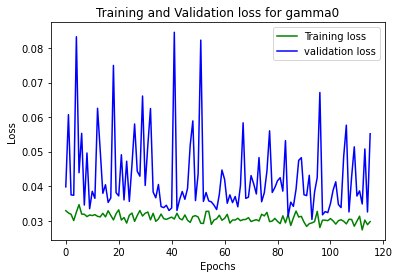

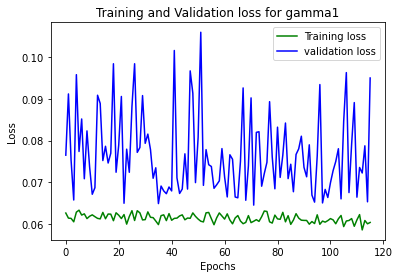

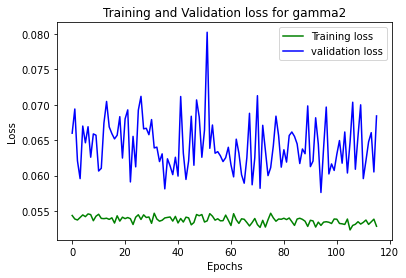

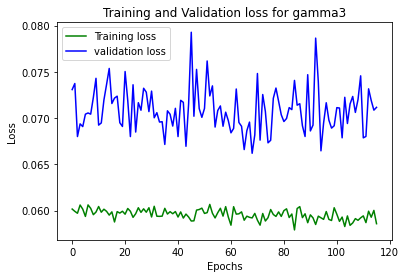

In [28]:
#loss for gamma0 values
loss_train = history.history['gamma0_output_loss']
loss_val = history.history['val_gamma0_output_loss']
epochs = range(0,116)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma0')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#loss for gamma1 values
loss_train = history.history['gamma1_output_loss']
loss_val = history.history['val_gamma1_output_loss']
epochs = range(0,116)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#loss for gamma2 values
loss_train = history.history['gamma2_output_loss']
loss_val = history.history['val_gamma2_output_loss']
epochs = range(0,116)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#loss for gamma3 values
loss_train = history.history['gamma3_output_loss']
loss_val = history.history['val_gamma3_output_loss']
epochs = range(0,116)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Metric

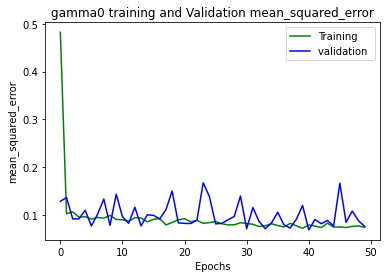

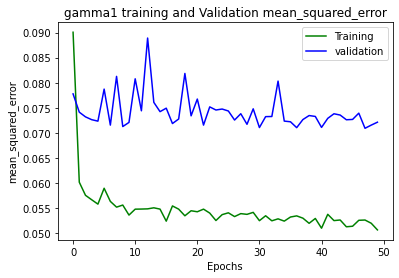

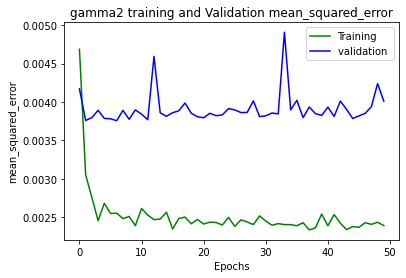

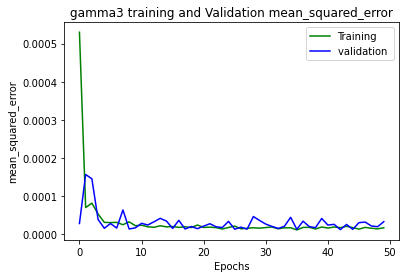

In [42]:
val = 'val_'
gam0out = 'gamma0_output_'
gam1out = 'gamma1_output_'
gam2out = 'gamma2_output_'
gam3out = 'gamma3_output_'

ac_train = history.history[gam0out + endmetric]
ac_val = history.history[val + gam0out + endmetric]
plt.plot(ac_train, 'g', label='Training')
plt.plot(ac_val, 'b', label='validation ')
plt.title('gamma0 training and Validation ' + endmetric)
plt.xlabel('Epochs')
plt.ylabel(endmetric)
plt.legend()
plt.show()



ac_train = history.history[gam1out + endmetric]
ac_val = history.history[val + gam1out + endmetric]
plt.plot(ac_train, 'g', label='Training')
plt.plot(ac_val, 'b', label='validation')
plt.title('gamma1 training and Validation ' + endmetric)
plt.xlabel('Epochs')
plt.ylabel(endmetric)
plt.legend()
plt.show()

ac_train = history.history[gam2out + endmetric]
ac_val = history.history[val + gam2out + endmetric]
plt.plot(ac_train, 'g', label='Training ',)
plt.plot(ac_val, 'b', label='validation ')
plt.title('gamma2 training and Validation ' + endmetric)
plt.xlabel('Epochs')
plt.ylabel(endmetric)
plt.legend()
plt.show()

ac_train = history.history[gam3out + endmetric]
ac_val = history.history[val + gam3out + endmetric]
plt.plot(ac_train, 'g', label='Training ')
plt.plot(ac_val, 'b', label='validation ')
plt.title('gamma3 training and Validation ' + endmetric)
plt.xlabel('Epochs')
plt.ylabel(endmetric)
plt.legend()
plt.show()